In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [2]:
b_size = 5
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1, fill_mode='nearest')

# horizontal_flip=True 수평 대칭 이미지를 50% 확률로 만듬
# width_shift_range=0.1 전체 크기의 10% 범위에서 좌우로 이동
# height_shift_range=0.1, 마찬가지로 위아래로 이동
                            # rotation_range=5,
                            # shear_range=0.7,
                            # zoom_range=[0.9, 2.2],
                            # vertical_flip=True,

In [3]:
train_generator = train_datagen.flow_from_directory('./train', target_size=(150, 150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.


In [4]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
test_generator = test_datagen.flow_from_directory('./test', target_size=(150, 150), batch_size=5, class_mode='binary')

Found 120 images belonging to 2 classes.


In [6]:
# 앞서 배운 CNN 모델을 만들어 적용하기
model = Sequential()             
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [7]:
# 모델 컴파일  
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [8]:
steps_train = len(train_generator)
steps_test = len(test_generator)

In [9]:
# 모델 실행
history = model.fit(train_generator, steps_per_epoch=steps_train, epochs=20, validation_data=test_generator, validation_steps=steps_test)

Epoch 1/20
32/32 [==============================] - 4s 113ms/step - loss: 0.6978 - accuracy: 0.5063 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 3s 103ms/step - loss: 0.6962 - accuracy: 0.5312 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 4s 109ms/step - loss: 0.6938 - accuracy: 0.5375 - val_loss: 0.6728 - val_accuracy: 0.5167
Epoch 4/20
32/32 [==============================] - 4s 112ms/step - loss: 0.6770 - accuracy: 0.5875 - val_loss: 0.6505 - val_accuracy: 0.8250
Epoch 5/20
32/32 [==============================] - 3s 106ms/step - loss: 0.6541 - accuracy: 0.6250 - val_loss: 0.6418 - val_accuracy: 0.5417
Epoch 6/20
32/32 [==============================] - 3s 104ms/step - loss: 0.6311 - accuracy: 0.6125 - val_loss: 0.5638 - val_accuracy: 0.7583
Epoch 7/20
32/32 [==============================] - 3s 106ms/step - loss: 0.5488 - accuracy: 0.7500 - val_loss: 0.5093 - val_accuracy: 0.8000
Epoch 

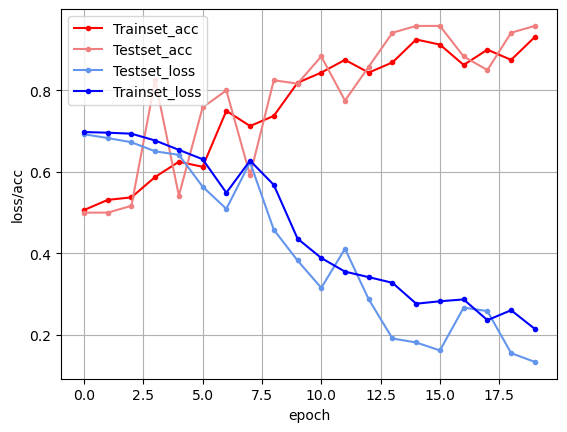

In [10]:
# 결과를 그래프로 표현하는 부분
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', \
         label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', \
         label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()